In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx
import dwave_networkx as dnx
from dwave.embedding import pegasus
import dwave.system

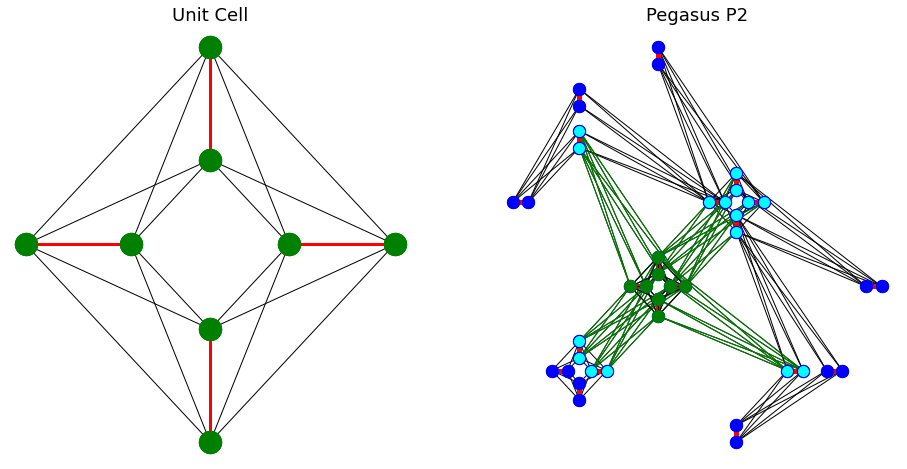

In [2]:
pegasus_2 = dnx.pegasus_graph(2) # complete P_2
unit_cell_nodes = [8, 9, 10, 11, 36, 37, 38, 39]
odd_edges = [(node, node+1) for node in pegasus_2 if not node%2] # odd couplers

pegasus_k44 = dnx.pegasus_graph(2, node_list=unit_cell_nodes)
pegasus_k44_odd = dnx.pegasus_graph(2,node_list=unit_cell_nodes, edge_list=odd_edges)
pegasus_connections = dnx.pegasus_graph(2, edge_list=pegasus_2.edges(unit_cell_nodes))
pegasus_connections_odd = dnx.pegasus_graph(2, edge_list=odd_edges)

fig, ax = plt.subplots(1, 2, figsize=(16,8))
dnx.draw_pegasus(pegasus_k44, ax=ax[0], node_size=500, node_color='g', crosses=True)
dnx.draw_pegasus(pegasus_k44_odd, ax=ax[0], node_size=500, node_color='g', edge_color='r', width=3, crosses=True)
ax[0].set_title('Unit Cell', fontsize=18)

dnx.draw_pegasus(pegasus_2, ax=ax[1], node_size=150, node_color='b', crosses=True)
dnx.draw_pegasus(pegasus_connections_odd, ax=ax[1], node_size=150, node_color='b', edge_color='r', width=5, crosses=True)
dnx.draw_pegasus(pegasus_connections, ax=ax[1], node_size=100, node_color='cyan', edge_color='g',crosses=True)
dnx.draw_pegasus(pegasus_k44, ax=ax[1], node_size=150, node_color='g', crosses=True)
ax[1].set_title('Pegasus P2', fontsize=18)
plt.show()

In [3]:
# Define target Pegasus Graph
M = 16 # Defines number of qubits in Pegasus graph : 24M(M-1)
P_M = dnx.pegasus_graph(M, data = True) # allow the use of pegasus indizes
print(f"P 16: Nodes {P_M.number_of_nodes()}   Connections {P_M.number_of_edges()}")
degree_ct = Counter()
for node, degree in dict(P_M.degree()).items():
    degree_ct[degree] += 1
print("Degree to number of nodes: ", degree_ct)

P 16: Nodes 5640   Connections 40484
Degree to number of nodes:  Counter({15: 4472, 14: 688, 7: 208, 11: 208, 6: 32, 10: 32})


In [4]:
# Embedding K_a into P_M
# Define source complete graph
a = 12*(M-1) # See section 3.1 in Next Generation Topologies White Paper
K_a = nx.complete_graph(a)
chain_ct = Counter()
print(f"complete graph of size {a=}")
embedding = pegasus.find_clique_embedding(K_a, target_graph=P_M) # heuristic search
if embedding:
    print("Found Embedding")
    for node, chainlist in embedding.items():
        chain_ct[len(chainlist)] += 1
    print(f"The embedding has {len(embedding.keys())} nodes")
print("Length of chains to number of logical qubits: ", chain_ct)

complete graph of size a=180
Found Embedding
The embedding has 180 nodes
Length of chains to number of logical qubits:  Counter({17: 114, 16: 50, 18: 16})


In [9]:
sampler = dwave.system.DWaveSampler()
print(f"Sampler with {sampler.properties['topology']['type']} topology and processor {sampler.properties['chip_id']}.")
print(f"Has default annealing time {sampler.properties['default_annealing_time']} "  
    + f"and range {sampler.properties['annealing_time_range']} in microseconds")

Sampler with pegasus topology and processor Advantage_system1.1.
Has default annealing time 20 and range [1, 2000] in microseconds
